In [113]:
import pandas as pd
import numpy as np

In [114]:
#! pip install -U scikit-learn

In [115]:
fake = pd.read_csv('fake_job_postings.csv')
fake.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [116]:
fake['job_company_info'] = fake['company_profile'] + fake['requirements'] + fake['benefits'] + fake['description']+fake['title']

fake.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,job_company_info
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NaN
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,"90 Seconds, the worlds Cloud Video Production ..."
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Our passion for improving quality of life thro...
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,SpotSource Solutions LLC is a Global Human Cap...


In [117]:
fake.drop(['requirements','company_profile','description','benefits','title'],axis=1,inplace=True)
fake.head()

,job_id,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,job_company_info
0,1,"US, NY, New York",Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NaN
1,2,"NZ, , Auckland",Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,"90 Seconds, the worlds Cloud Video Production ..."
2,3,"US, IA, Wever",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,"US, DC, Washington",Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Our passion for improving quality of life thro...
4,5,"US, FL, Fort Worth",NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,SpotSource Solutions LLC is a Global Human Cap...


In [118]:
import pickle
with open('lsa_summary.pkl','rb') as file:
    summary = pickle.load(file)

In [119]:
for i in summary[0]:
    print(i[1])

0.0668153104781061


In [120]:
numeric_summary = []
for List in summary:
    for innerList in List:
        number = innerList[1]
        numeric_summary.append(number)     

In [121]:
numeric_summary

[0.0668153104781061,
 0.030015011259383207,
 0.07669649888473704,
 0.042874646285627205,
 0.05652334189442215,
 0.1709408646894569,
 0.07254762501100116,
 0.049446817643414874,
 0.07106690545187015,
 0.07495316889958614,
 0.12110096839533452,
 0.06868028197434452,
 0.05832118435198043,
 0.07352146220938077,
 0.06900655593423542,
 0.05439282932204212,
 0.10314212462587934,
 0.09712858623572641,
 0.07235746052924216,
 0.0663723311599972,
 0.05157106231293967,
 0.04038961958610097,
 0.044455422447438706,
 0.05547001962252291,
 0.18257418583505536,
 0.037011660509880265,
 0.07035975447302918,
 0.11867816581938533,
 0.07832604499879574,
 0.06454972243679027,
 0.05063696835418333,
 0.11396057645963795,
 0.2668802563418119,
 0.062136976600120006,
 0.09622504486493763,
 0.2,
 0.2,
 0.0563436169819011,
 0.05496497099293127,
 0.06337242505244779,
 0.3713906763541037,
 0.3713906763541037,
 0.23570226039551587,
 0.08111071056538127,
 0.055641488407465724,
 0.062017367294604234,
 0.0271964146610210

In [122]:
#Concatenating the numeric values for text data in the dataframe.
num_df = pd.DataFrame(numeric_summary,columns=['Vec_output'])
num_df.head()
print('=========================================================')
print('The dataframe after concatenating.')
final_df = pd.concat([fake,num_df],axis=1)
final_df.head()

The dataframe after concatenating.


,job_id,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,job_company_info,Vec_output
0,1,"US, NY, New York",Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NaN,0.066815
1,2,"NZ, , Auckland",Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,"90 Seconds, the worlds Cloud Video Production ...",0.030015
2,3,"US, IA, Wever",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.076696
3,4,"US, DC, Washington",Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Our passion for improving quality of life thro...,0.042875
4,5,"US, FL, Fort Worth",NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,SpotSource Solutions LLC is a Global Human Cap...,0.056523


In [123]:
final_df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
txt = final_df['location'][0]
text = txt.split(",")
print(text)
print(text[0])

['US', ' NY', ' New York']
US


In [125]:
final_df.isna().sum()

job_id                     0
location                 346
department             11547
salary_range           15012
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
job_company_info        9034
Vec_output                 0
dtype: int64

In [126]:
final_df.shape

(17880, 15)

In [127]:
#Majority of attributes have high % of NA values. Hence no point in imputation.
final_df.drop(['department','salary_range','telecommuting','required_experience','required_education','function','job_company_info'],axis=1,inplace=True)

In [128]:
final_df.columns

Index(['job_id', 'location', 'has_company_logo', 'has_questions',
       'employment_type', 'industry', 'fraudulent', 'Vec_output'],
      dtype='object')

In [129]:
def extract_country(text):
    if isinstance(text,str):
        txt = text.split(",")
        extract = txt[0]
        return extract
    

In [130]:
final_df['location'] = final_df['location'].apply(extract_country)

In [131]:
final_df.location

0        US
1        NZ
2        US
3        US
4        US
         ..
17875    CA
17876    US
17877    US
17878    NG
17879    NZ
Name: location, Length: 17880, dtype: object

In [132]:
final_df.location.isna().sum()

346

In [133]:
final_df.location.value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
PE        1
SD        1
UG        1
KH        1
Name: location, Length: 90, dtype: int64

In [134]:
from sklearn.impute import SimpleImputer

In [135]:
impute = SimpleImputer(strategy='most_frequent')
imputed_data = impute.fit_transform(final_df)

In [136]:
imputed_df = pd.DataFrame(imputed_data,columns=final_df.columns)

In [137]:
imputed_df.head()

,job_id,location,has_company_logo,has_questions,employment_type,industry,fraudulent,Vec_output
0,1,US,1,0,Other,Information Technology and Services,0,0.066815
1,2,NZ,1,0,Full-time,Marketing and Advertising,0,0.030015
2,3,US,1,0,Full-time,Information Technology and Services,0,0.076696
3,4,US,1,0,Full-time,Computer Software,0,0.042875
4,5,US,1,1,Full-time,Hospital & Health Care,0,0.056523


In [138]:
imputed_df.dropna(inplace=True)

In [139]:
imputed_df.isna().sum()
print(imputed_df.columns)

Index(['job_id', 'location', 'has_company_logo', 'has_questions',
       'employment_type', 'industry', 'fraudulent', 'Vec_output'],
      dtype='object')


In [140]:
imputed_df['employment_type'].value_counts()

Full-time    14781
Contract      1512
Part-time      783
Temporary      239
Other          219
Name: employment_type, dtype: int64

In [141]:
imputed_df['industry'].value_counts()

Information Technology and Services    6373
Computer Software                      1364
Internet                               1048
Education Management                    822
Marketing and Advertising               821
                                       ... 
Museums and Institutions                  1
Wine and Spirits                          1
Shipbuilding                              1
Alternative Dispute Resolution            1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [142]:
imputed_df.dtypes

job_id              object
location            object
has_company_logo    object
has_questions       object
employment_type     object
industry            object
fraudulent          object
Vec_output          object
dtype: object

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
le = LabelEncoder()
imputed_df['industry'] = le.fit_transform(imputed_df['industry']).ravel()
imputed_df['employment_type'] = le.fit_transform(imputed_df['employment_type']).ravel()
imputed_df['location'] = le.fit_transform(imputed_df['location']).ravel()

In [145]:
imputed_df['location']

0        85
1        60
2        85
3        85
4        85
         ..
17875    12
17876    85
17877    85
17878    56
17879    60
Name: location, Length: 17534, dtype: int32

In [146]:
imputed_df['fraudulent'].value_counts(normalize=True)

0    0.951694
1    0.048306
Name: fraudulent, dtype: float64

In [147]:
print('Data types after LabelEncoding')
imputed_df.dtypes

Data types after LabelEncoding


job_id              object
location             int32
has_company_logo    object
has_questions       object
employment_type      int32
industry             int32
fraudulent          object
Vec_output          object
dtype: object

In [148]:
#Converting the columns with object datatype to numeric. Except job_id.
for i in imputed_df.columns[1:8]:
    if imputed_df[i].dtype == 'object':
        imputed_df[i] = pd.to_numeric(imputed_df[i],errors='coerce')

In [149]:
print('After coversion data types')
imputed_df.dtypes

After coversion data types


job_id               object
location              int32
has_company_logo      int64
has_questions         int64
employment_type       int32
industry              int32
fraudulent            int64
Vec_output          float64
dtype: object

In [150]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [151]:
X = imputed_df.drop(['fraudulent','job_id'],axis=1)
Y = imputed_df['fraudulent']
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=123,shuffle=True)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(14027, 6)
(3507, 6)
(14027,)
(3507,)


In [152]:
print('The ratio of classes in target attribute after spliting are',ytrain.value_counts(normalize=True))

The ratio of classes in target attribute after spliting are 0    0.952235
1    0.047765
Name: fraudulent, dtype: float64


In [153]:
print('The ratio of classes in target attribute for test set are',ytest.value_counts(normalize=True))

The ratio of classes in target attribute for test set are 0    0.94953
1    0.05047
Name: fraudulent, dtype: float64


In [154]:
xtrain.Vec_output.mean()

0.10334645145739618

In [155]:
xtrain.fillna( 0.103346,inplace=True)

In [156]:
xtrain.dtypes

location              int32
has_company_logo      int64
has_questions         int64
employment_type       int32
industry              int32
Vec_output          float64
dtype: object

In [157]:
ytrain = le.fit_transform(ytrain)

In [158]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
#print('Before',ytrain.value_counts(normalize=True))
xtrain_sm,ytrain_sm = smt.fit_resample(xtrain,ytrain)
#print('After',ytrain_sm.value_counts(normalize=True))

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score,confusion_matrix

In [160]:
ytrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
lr = LogisticRegression(random_state=10,solver='newton-cholesky')
lr.fit(xtrain_sm,ytrain_sm)

LogisticRegression(random_state=10, solver='newton-cholesky')

In [162]:
def evaluate(ytrue, ypred):
    accuracy = accuracy_score(ytrue, ypred)
    recall = recall_score(ytrue, ypred)
    precision = precision_score(ytrue, ypred, zero_division=1)
    f1 = f1_score(ytrue, ypred)

    print(f'Accuracy is {accuracy:.2f}')
    print(f'Recall is {recall:.2f}')
    print(f'Precision is {precision:.2f}')
    print(f'F1 score is {f1:.2f}')

In [163]:
pred_train = lr.predict(xtrain)

In [164]:
print('The metrics for training set are')
evaluate(ytrain,pred_train)

The metrics for training set are
Accuracy is 0.81
Recall is 0.66
Precision is 0.15
F1 score is 0.25


In [165]:
y_prob = lr.predict_proba(xtest)[:,1]
y_prob

array([0.16214796, 0.11472438, 0.30810997, ..., 0.1614673 , 0.32285238,
       0.11908892])

#### > In binary classification Logistic Regression has threshold of 0.5. Any probality greater than 0.5 is 1 and else than 0.5 is 0. 


#### > In our case we want our model to have low false rate. This can be achieved by emphasizing our recall scores.


#### > We are evaluating best threshold for our model which maximizes the recall score.

In [166]:
def trade_off(ytest,y_prob):
    threshold = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    score = {}
    for i in threshold:
        y_pred = [1 if prob >= i else 0 for prob in y_prob]
        recall = recall_score(ytest,y_pred)
        precision = precision_score(ytest,y_pred)
        score.update({i:[recall,precision]})
    return score

In [167]:
recall_precision_trade_off = trade_off(ytest,y_prob)

In [168]:
recall_precision_trade_off

{0.2: [0.9717514124293786, 0.07116259826230864],
 0.3: [0.8813559322033898, 0.10283454185893211],
 0.4: [0.6949152542372882, 0.13882618510158012],
 0.5: [0.5706214689265536, 0.1463768115942029],
 0.6: [0.536723163841808, 0.16101694915254236],
 0.7: [0.5310734463276836, 0.17279411764705882],
 0.8: [0.4180790960451977, 0.15913978494623657]}

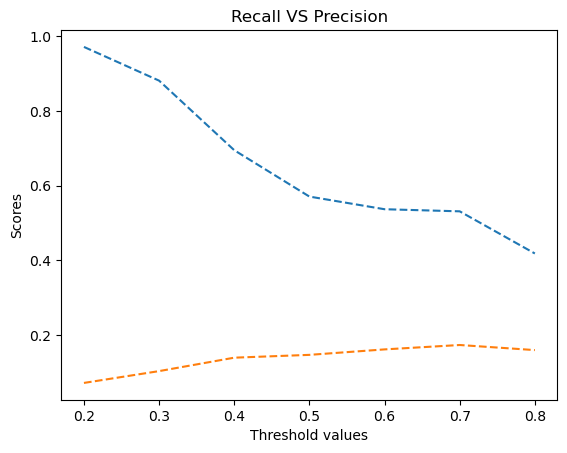

In [169]:
import matplotlib.pyplot as plt
x_values = recall_precision_trade_off.keys()
y_values = recall_precision_trade_off.values()
plt.plot(x_values,y_values,linestyle='dashed')
plt.xlabel('Threshold values')
plt.ylabel('Scores')
plt.title('Recall VS Precision')
plt.show()

In [170]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.metrics import roc_auc_score

In [171]:
#rf = RandomForestClassifier()
#params = {
##    'max_depth':[3,6,9,12],'criterion':['entropy','gini'],
 #   'max_features':['log2','sqrt'],
#    'min_samples_split':[2,3],'n_estimators':[50,100,150]
#}
#grid = GridSearchCV(estimator = rf, param_grid = params , scoring='recall')
#grid.fit(xtrain_sm,ytrain_sm) 

In [172]:
#grid.best_params_ 

In [173]:
rdf = RandomForestClassifier(random_state=10,criterion='gini',max_depth=12,min_samples_split=3\
                            ,max_features='log2',n_estimators=150)
rdf.fit(xtrain_sm,ytrain_sm)

RandomForestClassifier(max_depth=12, max_features='log2', min_samples_split=3,
                       n_estimators=150, random_state=10)

In [174]:
rdf_train_pred = rdf.predict(xtrain_sm)
print('The metrics for train set are')
evaluate(ytrain_sm,rdf_train_pred)

The metrics for train set are
Accuracy is 0.91
Recall is 0.92
Precision is 0.90
F1 score is 0.91


In [175]:
rdf_test_pred = rdf.predict(xtest)
print('The metrics for test set are')
evaluate(ytest,rdf_test_pred)

The metrics for test set are
Accuracy is 0.87
Recall is 0.77
Precision is 0.25
F1 score is 0.37


In [176]:
yprob_rf = rdf.predict_proba(xtest)[:,1]
recall_precision_trade_off_rf = trade_off(ytest,yprob_rf)

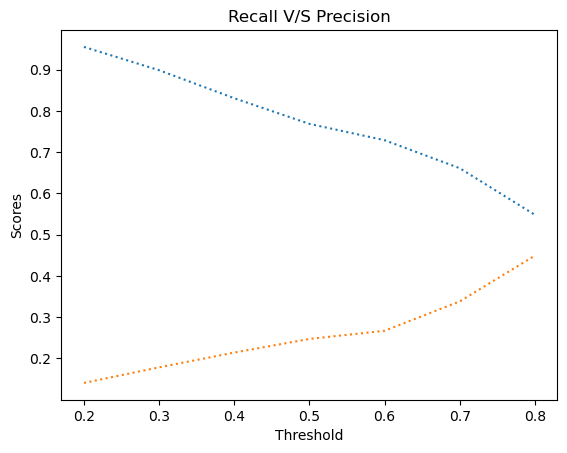

In [177]:
x = recall_precision_trade_off_rf.keys()
y = recall_precision_trade_off_rf.values()
plt.plot(x,y,linestyle='dotted')
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.title('Recall V/S Precision')
plt.show()

In [178]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=2)
scores = cross_val_score(rdf,xtest,ytest,cv=cv,n_jobs=-1,scoring='roc_auc')
print("Mean scores of ROC AUC for Random Forest are %.3f "%scores.mean())

Mean scores of ROC AUC for Random Forest are 0.892 


In [179]:
#dclf = DecisionTreeClassifier()
#param ={'max_depth':[5,8,11,14],
#    'min_samples_split':[2,3],'max_features':['log2','sqrt']
#}
#grid_dt = GridSearchCV(estimator=dclf,param_grid=param,scoring='recall')
#grid_dt.fit(xtrain_sm,ytrain_sm)

In [180]:
#grid_dt.best_params_

In [181]:
dtclf = DecisionTreeClassifier(max_depth=14,max_features='sqrt',min_samples_split=2,random_state=11)
dtclf.fit(xtrain_sm,ytrain_sm)

DecisionTreeClassifier(max_depth=14, max_features='sqrt', random_state=11)

In [182]:
train_pred_dt = dtclf.predict(xtrain)
print('The metrics for train set are')
evaluate(ytrain,train_pred_dt)

The metrics for train set are
Accuracy is 0.90
Recall is 0.92
Precision is 0.31
F1 score is 0.46


In [183]:
test_pred_dt = dtclf.predict(xtest)
print('The metrics for test set are')
evaluate(ytest,test_pred_dt)

The metrics for test set are
Accuracy is 0.86
Recall is 0.76
Precision is 0.23
F1 score is 0.35


In [185]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [186]:
model = BalancedRandomForestClassifier(criterion='gini',max_depth=12,min_samples_split=3\
                            ,max_features='log2',n_estimators=150,random_state=13)
model.fit(xtrain,ytrain)

D:\Users\maven\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
D:\Users\maven\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(max_depth=12, max_features='log2',
                               min_samples_split=3, n_estimators=150,
                               random_state=13)

In [187]:
print('The metrics for training set are')
evaluate(ytrain,model.predict(xtrain))

The metrics for training set are
Accuracy is 0.82
Recall is 0.94
Precision is 0.21
F1 score is 0.34


In [188]:
print('The metrics for test set are')
evaluate(ytest,model.predict(xtest))

The metrics for test set are
Accuracy is 0.81
Recall is 0.85
Precision is 0.19
F1 score is 0.31


In [189]:
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.metrics import roc_auc_score

In [190]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model,xtest,ytest,scoring='roc_auc',cv=cv,n_jobs=-1)
print('Mean scores of ROC_AUC: %.3f'% scores.mean())

Mean scores of ROC_AUC: 0.884


In [191]:
print('The confusion matrix for Balanced Random Forest on test set')
print(confusion_matrix(y_true= ytest,y_pred=model.predict(xtest)))

print("\n")
print("The confusion matrix for Balanced Random Forest on train set")
print(confusion_matrix(ytrain,model.predict(xtrain)))

The confusion matrix for Balanced Random Forest on test set
[[2688  642]
 [  26  151]]


The confusion matrix for Balanced Random Forest on train set
[[10936  2421]
 [   37   633]]


In [192]:
from sklearn.ensemble import AdaBoostClassifier

In [193]:
#Adaboost Classifier 
model_ada = AdaBoostClassifier(random_state=14,n_estimators=100,learning_rate=0.15)
#Model fitting on augmented data.
model_ada.fit(xtrain_sm,ytrain_sm)
#Testing the model on test data set using Repeated Stratified sample.
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=5)
scores = cross_val_score(model_ada,xtest,ytest,cv=cv,scoring='roc_auc',n_jobs=-1)
print("Mean scores of ROC AUC %.3f"%scores.mean())

Mean scores of ROC AUC 0.833


In [194]:
#! pip install xgboost

In [195]:
from xgboost import XGBClassifier

In [196]:
xgb = XGBClassifier(random_state=22)
xgb.fit(xtrain_sm,ytrain_sm)
# Testing model using Repeated Stratified fold.
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=23)
# Defining the cross validation score.
scores = cross_val_score(xgb,xtest,ytest,cv=cv,scoring='roc_auc')
print("Mean scores of ROC AUC %.3f"%scores.mean())

Mean scores of ROC AUC 0.881


##### - The models after synthetic data augmentation are giving better ROC AUC scores.
##### - However we want to increase Precision scores to ensure the positives are predicted correctly.

In [197]:
imputed_df.shape

(17534, 8)

In [198]:
imputed_df.columns

Index(['job_id', 'location', 'has_company_logo', 'has_questions',
       'employment_type', 'industry', 'fraudulent', 'Vec_output'],
      dtype='object')

In [199]:
imputed_df.fillna('0.103',inplace=True)
X = imputed_df.drop(['fraudulent','job_id'],axis=1)
Y = imputed_df['fraudulent']

In [200]:
#Using Isolation Forest for anamoly detection.
from sklearn.ensemble import IsolationForest
# Defining the models and fitting X and Y.
isolation_forest = IsolationForest(n_estimators=100,max_samples='auto',contamination='auto',random_state=55)
isolation_forest.fit(X,Y) # Fitting on all features.
# Predicting anamolies.
imputed_df['anamoly'] = isolation_forest.predict(X)

In [201]:
imputed_df['scores'] = isolation_forest.decision_function(X)

In [202]:
imputed_df['anamoly'].value_counts()

 1    12456
-1     5078
Name: anamoly, dtype: int64

In [203]:
imputed_df['anamoly'].replace([1,-1],[0,1],inplace=True)

In [204]:
imputed_df['anamoly'].value_counts()

0    12456
1     5078
Name: anamoly, dtype: int64

0.559361864239913


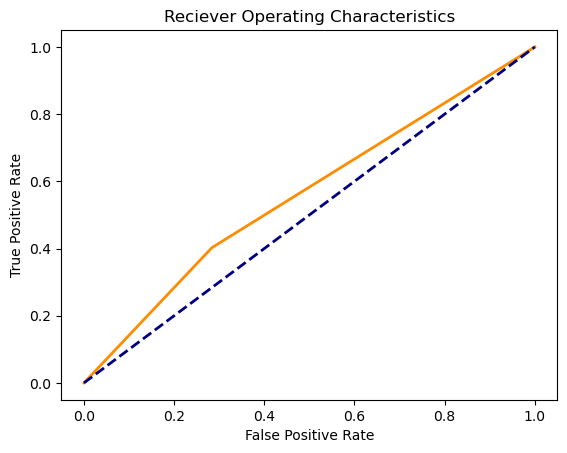

In [205]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(imputed_df.fraudulent,imputed_df.anamoly)
roc_auc = auc(fpr,tpr)
print(roc_auc)

#Plotting the ROC Curve.
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label='Roc Curve (area = %0.2f)'%roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.show()

In [208]:
from sklearn.neighbors import LocalOutlierFactor

In [209]:
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto'\
                          ,leaf_size=30, metric='minkowski'\
                            ,p=2,contamination='auto')
y_pred = lof.fit_predict(X)
y_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [210]:
type(y_pred)

numpy.ndarray

In [211]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [212]:
evaluate(Y,y_pred)

Accuracy is 0.73
Recall is 0.27
Precision is 0.05
F1 score is 0.09


In [213]:
# Here we can see Anamoly Detection algorithms are performancing as compared SMOTE applied models.